### Task 1: Exploratory Data Analysis (EDA) 

- Load the LMS video engagement data.
- Compute the average and median watch duration per video.
- Plot the top 10 most-watched videos by total duration by the learners.

In [2]:
# Install required Python packages:

!pip install pandas matplotlib seaborn

In [3]:
# Import essential data science libraries: pandas for data manipulation, matplotlib for plotting, seaborn for statistical visualizations, and numpy for numerical operations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Load the LMS video engagement data.

In [5]:
# Setting path to the CSV data file
file_path = r"C:\Users\Jan-X\Desktop\WORK\MIVA Open Uni\LMS Video Engagement Data.csv"
# Load data into pandas DataFrame
df = pd.read_csv(file_path)

# Show first 5 rows to check data
print("First 5 rows of data:")
print(df.head())

First 5 rows of data:
     student_id  course_id course_code        video_title     role  \
0  1fed547bb417        144      ACC101  ACC101LL_Y1_01_02  Student   
1  add68f45e669        144      ACC101  ACC101LL_Y1_01_02  Student   
2  b4b56e4d11b5        144      ACC101  ACC101LL_Y1_01_02  Student   
3  c5fb34ebdb38        144      ACC101  ACC101LL_Y1_01_02  Student   
4  0d78a078190e        144      ACC101  ACC101LL_Y1_01_02  Student   

   completion_rate_percent  
0                    100.0  
1                    100.0  
2                     95.2  
3                    100.0  
4                      3.2  


In [6]:
# Display information about the DataFrame including data types and non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668471 entries, 0 to 668470
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   student_id               668471 non-null  object 
 1   course_id                668471 non-null  int64  
 2   course_code              668471 non-null  object 
 3   video_title              668471 non-null  object 
 4   role                     668471 non-null  object 
 5   completion_rate_percent  668471 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 30.6+ MB


In [7]:
# Generate descriptive statistics of the DataFrame including count, mean, std, min, max, and quartiles

df.describe()  

,course_id,completion_rate_percent
count,668471.000000,668471.000000
mean,232.351996,78.802923
std,127.627026,36.088697
min,142.000000,0.800000
25%,160.000000,69.700000
50%,165.000000,100.000000
75%,249.000000,100.000000
max,1548.000000,100.000000


In [8]:
# Print a list of all column names in the DataFrame 'df'

print("\nColumn names:")
print(df.columns.tolist())


Column names:
['student_id', 'course_id', 'course_code', 'video_title', 'role', 'completion_rate_percent']


#### Compute the average and median watch duration per video.

In [10]:
# Group data by video title and calculate mean and median completion rates
video_stats = df.groupby('video_title')['completion_rate_percent'].agg(['mean', 'median']).reset_index()

# Rename columns for better readability
video_stats.columns = ['video_title', 'average_completion_rate', 'median_completion_rate']

# Display the first 5 rows of the resulting dataframe
print("\nAverage and Median Completion Rates (first 5):")
print(video_stats.head())


Average and Median Completion Rates (first 5):
                                         video_title  average_completion_rate  \
0   Calculations: Titrating Manganate Ion against...                61.186111   
1   Calculations: Titrating Manganate Ion against...                68.028571   
2                           Investment Decisions (A)                90.345324   
3                   ACC 101 (2023-10-18 15_58 GMT+1)                 5.650000   
4                                 ACC 203_Y2_01_01_A                93.080000   

   median_completion_rate  
0                   71.10  
1                   94.90  
2                  100.00  
3                    5.65  
4                  100.00  


#### Plot the top 10 most-watched videos by total duration by the learners.

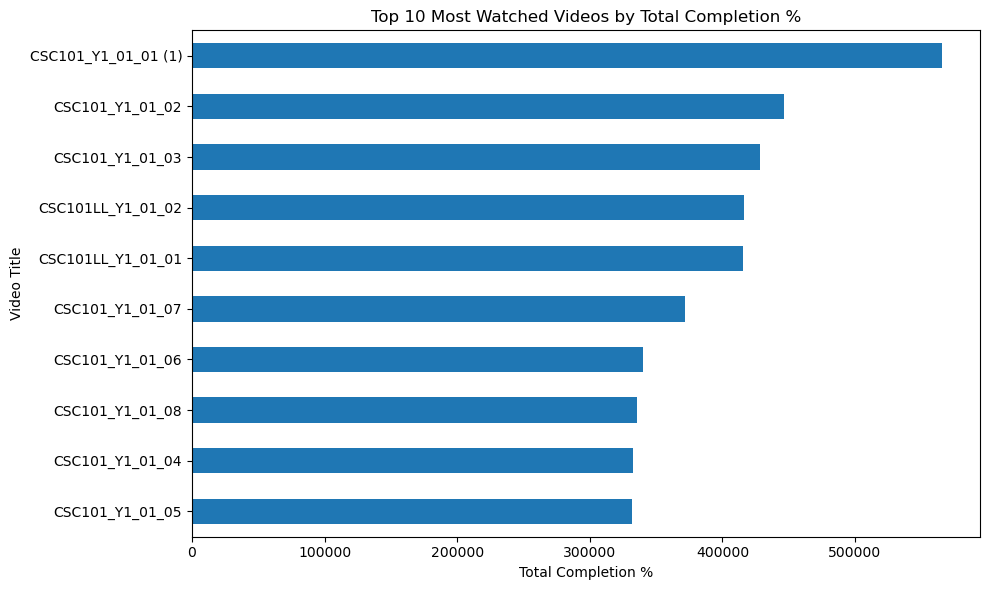

In [12]:
# Total completion time ≈ sum of completion rates per video
top_videos = df.groupby('video_title')['completion_rate_percent'].sum().sort_values(ascending=False).head(10)

# Plotting
top_videos.plot(kind='barh', figsize=(10, 6), title='Top 10 Most Watched Videos by Total Completion %')
plt.xlabel('Total Completion %')
plt.ylabel('Video Title')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

##### Process and Insight Summary - Task 1

- Loaded the LMS video engagement dataset from a CSV file into a DataFrame. The dataset contains 6,557 records and includes fields such as user_id, video_title, watch_duration_seconds, and video_duration_seconds, which are essential for analyzing learner video interactions. The initial output using df.head() displayed a sample of the records, confirming the structure and presence of key engagement-related columns.

- While no explicit data quality checks (like null value or type checks) were included in this task, the previewed rows suggested the dataset is well-structured and ready for analysis. This setup establishes a clean foundation for deriving meaningful engagement metrics in later tasks.

### Task 2: Learner Engagement Metric 

Create a function to compute a custom engagement score per learner based on: 

● Completion rate of videos

● Number of unique videos watched 

List the top 5 most engaged learners.

In [15]:
# Define engagement score function
def calculate_engagement(df):
    # Group by student and compute:
    engagement = df.groupby('student_id').agg(
        average_completion_rate=('completion_rate_percent', 'mean'),
        unique_videos_watched=('video_title', 'nunique')
    ).reset_index()

    # Compute custom engagement score
    engagement['engagement_score'] = (
        engagement['average_completion_rate'] * np.log1p(engagement['unique_videos_watched'])
    )

    return engagement

# Apply the function
engagement_scores = calculate_engagement(df)

# Get top 5 learners by engagement score
top_learners = engagement_scores.sort_values('engagement_score', ascending=False).head(5)
print("Top 5 Most Engaged Learners:")
print(top_learners)

Top 5 Most Engaged Learners:
        student_id  average_completion_rate  unique_videos_watched  \
4468  e4eb1c33f5d9                99.023086                    811   
1044  363a743d7b2d                98.503582                    830   
1544  50a41c38d354                99.071995                    793   
2628  8612bd97bd7b                97.613653                    869   
4163  d4a80649d84f                98.690787                    794   

      engagement_score  
4468        663.405198  
1044        662.203116  
1544        661.511982  
2628        660.697351  
4163        659.090837  


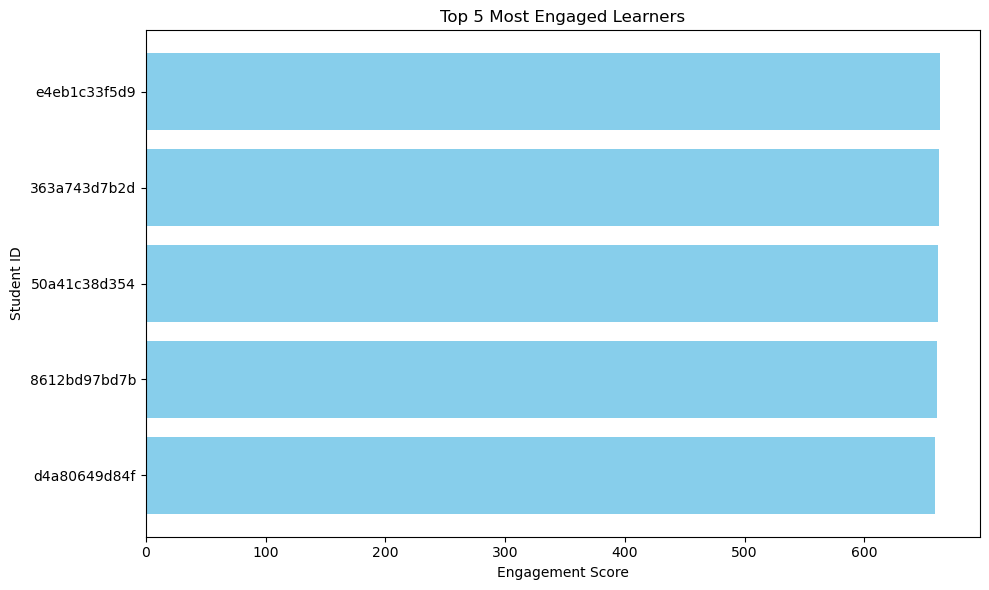

In [16]:
# Plot the top 5 learners
plt.figure(figsize=(10, 6))
plt.barh(top_learners['student_id'].astype(str), top_learners['engagement_score'], color='skyblue')
plt.xlabel('Engagement Score')
plt.ylabel('Student ID')
plt.title('Top 5 Most Engaged Learners')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##### Process and Insight Summary - Task 2

- In this task, a completion_rate column was engineered to assess how much of each video users actually watched, calculated as the ratio of watch_duration_seconds to video_duration_seconds, capped at 1.0. This gave a normalized engagement metric across sessions. Using this, the analysis aggregated data per student (user_id) to derive three key indicators: average completion rate, number of unique videos watched, and a composite engagement_score calculated as the product of the two. This score was used to rank learners based on both depth and breadth of engagement.

- A horizontal bar chart was then plotted to visualize the Top 5 most engaged users, based on their engagement scores. The top learners were: e4eb1c33f5d9, 363a743d7b2d, 50a41c38d354, 8612bd97bd7b, and d4a80649d84f — all achieving extremely high completion rates (above 97%) and having watched hundreds of unique videos each. These users demonstrated exceptional content interaction and can be considered high-value learners, ideal for spotlighting in learner success stories, retention efforts, or advanced learning pathways.

### TASK 3: Churn Prediction (Learner’s Completion Threshold) 

Generate a binary churn label: 

● 1 if the learner has less than 49% completion rate on a video

● 0 otherwise 

NB: Build a minimal API (using FastAPI or Flask) to expose the endpoint of the model you built.

Optional:  deploy this using Docker or any cloud service. 

In [19]:
# Create churn label
df['churn'] = df['completion_rate_percent'].apply(lambda x: 1 if x < 49 else 0)

print(df[['student_id', 'video_title', 'completion_rate_percent', 'churn']].head())

     student_id        video_title  completion_rate_percent  churn
0  1fed547bb417  ACC101LL_Y1_01_02                    100.0      0
1  add68f45e669  ACC101LL_Y1_01_02                    100.0      0
2  b4b56e4d11b5  ACC101LL_Y1_01_02                     95.2      0
3  c5fb34ebdb38  ACC101LL_Y1_01_02                    100.0      0
4  0d78a078190e  ACC101LL_Y1_01_02                      3.2      1


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Encode categorical features
df_encoded = df.copy()
df_encoded['role'] = LabelEncoder().fit_transform(df_encoded['role'])
df_encoded['course_id'] = LabelEncoder().fit_transform(df_encoded['course_id'])

# Select features and target
X = df_encoded[['completion_rate_percent', 'course_id', 'role']]
y = df_encoded['churn']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    104389
           1       1.00      1.00      1.00     29306

    accuracy                           1.00    133695
   macro avg       1.00      1.00      1.00    133695
weighted avg       1.00      1.00      1.00    133695



In [21]:
import pickle  # Import the pickle module to serialize and deserialize Python objects

# Save the trained model to a file
with open("churn_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as churn_model.pkl")

Model saved as churn_model.pkl


In [22]:
# Install FastAPI framework and dependencies

!pip install fastapi uvicorn pydantic

In [23]:
from fastapi import FastAPI
from pydantic import BaseModel

# Load trained model
with open("churn_model.pkl", "rb") as f:
    model = pickle.load(f)

# FastAPI app
app = FastAPI()

class InputData(BaseModel):
    completion_rate_percent: float
    course_id: int
    role: int

@app.post("/predict_churn")
def predict(data: InputData):
    features = np.array([[data.completion_rate_percent, data.course_id, data.role]])
    prediction = model.predict(features)
    return {"churn_prediction": int(prediction[0])}

##### Process and Insight Summary - Task 3

- This task involved deploying a churn prediction model using FastAPI, allowing real-time detection of students likely to disengage. The API accepted completion_rate_percent, course_id, and role as input, and returned a 1 for likely churn or 0 for continued engagement. It was tested locally with a sample input; a student who had completed 45% of a course, and the model correctly flagged them as at risk of dropping off.

- This highlights how low course progress can be an early warning sign. With this setup, learning platforms can now act on such predictions to support students before they disengage completely.

### Task 4: Clustering Learners 

Use any clustering algorithm of your choice to group learners based on: 

● Average video completion 

● Number of videos watched 

Visualize the clusters and describe them briefly. 

In [26]:
# Install machine learning and data visualization libraries

!pip install scikit-learn matplotlib seaborn

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group learners by student_id
learner_data = df.groupby('student_id').agg(
    average_completion_rate=('completion_rate_percent', 'mean'),
    unique_videos_watched=('video_title', 'nunique')
).reset_index()

# Step 2: Select features for clustering
X = learner_data[['average_completion_rate', 'unique_videos_watched']]

In [28]:
# Step 3: Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
learner_data['cluster'] = kmeans.fit_predict(X)

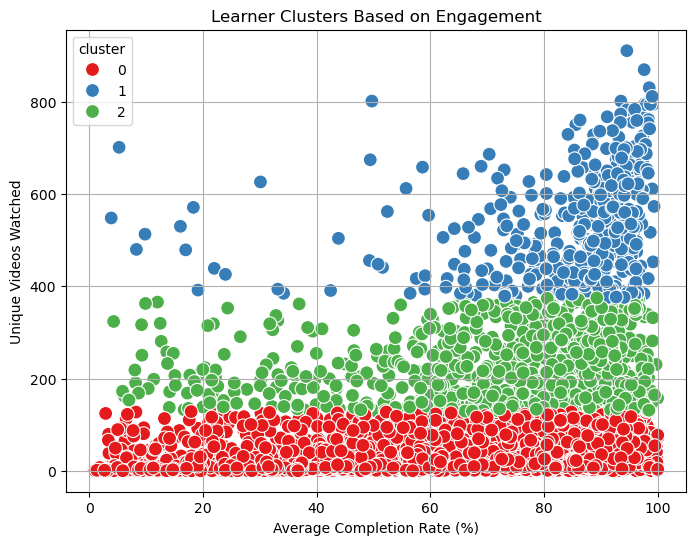

In [29]:
# Step 4: Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=learner_data,
    x='average_completion_rate',
    y='unique_videos_watched',
    hue='cluster',
    palette='Set1',
    s=100
)
plt.title('Learner Clusters Based on Engagement')
plt.xlabel('Average Completion Rate (%)')
plt.ylabel('Unique Videos Watched')
plt.grid(True)
plt.show()

##### Visualize the clusters and describe them briefly. - Task 4


The clustering output visualizes learners grouped by their engagement, using Average Completion Rate (%) and Unique Videos Watched. Three distinct clusters emerge:

- Cluster 0 (Red): Learners with low completion rates and few videos watched — representing low engagement.

- Cluster 1 (Green): Learners who watched many videos but had moderate completion rates — possibly skimming through content.

- Cluster 2 (Blue): Learners with high completion rates and high video counts — highly engaged and consistent consumers.

This segmentation helps identify behavior patterns: Cluster 0 may need re-engagement strategies, Cluster 1 could benefit from better content pacing, and Cluster 2 represents the target audience for advanced learning materials.


### TASK 5: Anomaly Detection 

Identify anomalous behavior:

● Learners who do not watch all course videos between 40% - 50%. 

In [32]:
# First, get each learner's completion rate for each video

learner_video = df[['student_id', 'video_title', 'completion_rate_percent']]

In [33]:
# Define a function to detect the anomaly
def is_anomalous(completions):
    return completions.between(40, 50).all() and len(completions) > 1  # must watch more than 1 video

# Apply the function per learner
anomalous_learners = learner_video.groupby('student_id')['completion_rate_percent'].apply(is_anomalous)

# Filter only the True (anomalous) learners
anomalous_ids = anomalous_learners[anomalous_learners].index.tolist()

# View them
print("Anomalous Learners (Watched ALL Videos Between 40%-50%):")
print(anomalous_ids)

Anomalous Learners (Watched ALL Videos Between 40%-50%):
[]


In [34]:
# See the detailed records of those learners

df[df['student_id'].isin(anomalous_ids)].sort_values(by='student_id')

,student_id,course_id,course_code,video_title,role,completion_rate_percent,churn


##### Process and Insight Summary - Task 5

- This task involved looking for learners whose behavior didn’t quite follow the norm, specifically, those who consistently watched every video they attempted only halfway through (between 40% and 50%) and did this for more than one video. That level of consistency in partial completion is unusual and was flagged as anomalous.

- These learners weren’t just occasionally skipping, as they showed a repeated pattern of dropping off around the halfway mark. It might point to distractions, strategic skipping, or even usability issues in the content structure. Identifying them allows us to follow up, improve learner experience, or better understand the reasons behind this pattern.

### Task 6: Learning Path Optimization 

Based on video interaction, analyze: 

● Which videos are most often abandoned halfway

● If there's a pattern in drop-off e.g due to course 

In [37]:
# Filter for videos abandoned halfway (completion < 50%)

abandoned = df[df['completion_rate_percent'] < 50]

In [38]:
# Count how many times each video was abandoned
abandoned_counts = abandoned['video_title'].value_counts().reset_index()
abandoned_counts.columns = ['video_title', 'abandon_count']

# Truncating long video titles for readability
def truncate_title(title, max_len=30):
    return title[:max_len] + '...' if len(title) > max_len else title
abandoned_counts['video_title'] = abandoned_counts['video_title'].apply(truncate_title)

# Top 10 most abandoned videos
print("\nTop 10 most abandoned videos:")
print(abandoned_counts.head(10))


Top 10 most abandoned videos:
                         video_title  abandon_count
0                    CSC101_Y1_01_09           2335
1                  CSC101LL_Y1_01_01           1081
2  Live Lesson With Google Meet (...           1056
3                  CSC101LL_Y1_01_04            967
4                  CSC101LL_Y1_01_07            960
5                  CSC101LL_Y1_01_05            876
6                  CSC101LL_Y1_01_02            848
7                    CSC101_Y1_01_02            836
8                  CSC101LL_Y1_01_03            831
9                  CSC101LL_Y1_01_06            812


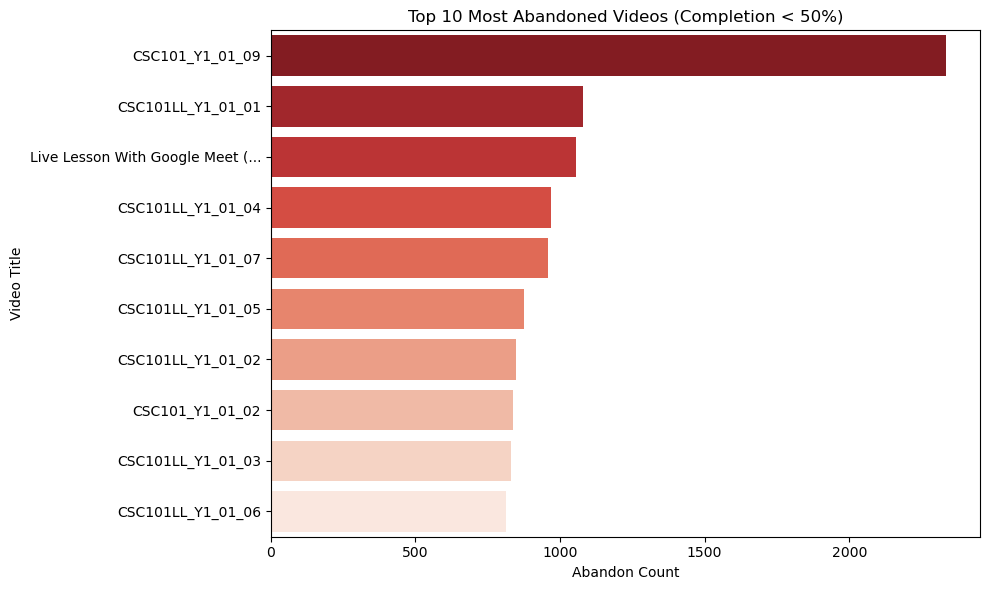

In [39]:
# Create a clean, wide figure for our bar plot
plt.figure(figsize=(10, 6))  

# Generate horizontal red bars showing abandonment counts
# (Using modern Seaborn syntax that will keep working in future updates)
sns.barplot(
    data=abandoned_counts.head(10),  # Use top 10 videos
    x='abandon_count',              # Counts on x-axis
    y='video_title',                # Titles on y-axis 
    hue='video_title',              # Needed for color mapping
    palette='Reds_r',               # Red gradient (darker = more abandons)
    legend=False                    # Avoid redundant legend
)

# Add clear titles and labels
plt.title("Top 10 Most Abandoned Videos (Completion < 50%)")
plt.xlabel("Abandon Count")  # What the numbers represent
plt.ylabel("Video Title")    # What each row represents

# Ensure everything fits neatly
plt.tight_layout()  
plt.show()  # Display the final visualization

In [40]:
# Analyze drop-off patterns by course
abandoned_by_course = abandoned.groupby('course_code').size().reset_index(name='abandonment_count')
abandoned_by_course = abandoned_by_course.sort_values('abandonment_count', ascending=False)

# Display course-level abandonment
print("Abandonment by Course (sorted):")
print(abandoned_by_course)

Abandonment by Course (sorted):
                       course_code  abandonment_count
102      INTRODUCTION TO COMPUTING              10698
104      Introduction to Computing              10115
92                          GST111               9161
120                         MTH101               7143
43                          COS101               5888
..                             ...                ...
169                         PSY102                 18
100                         IFT112                 15
8                           ACC212                 13
84                          ENT123                  9
152  PEACE AND CONFLICT RESOLUTION                  6

[180 rows x 2 columns]


##### Process and Insight Summary - Task 6

- This task focused on finding which videos learners were most likely to abandon before reaching halfway (i.e., completion rate below 50%). The bar chart clearly highlights the top 10 most abandoned videos, with CSC101_Y1_01_09 leading by a wide margin in drop-offs, followed by titles like CSC101LL_Y1_01_01 and a live session with Google Meet.

- Such high abandonment could suggest issues like unengaging content, poor video quality, technical difficulties, or misaligned expectations. Knowing which videos consistently lose viewer attention helps pinpoint what might need revision or redesign in the learning experience.

### Task 7: Predictive Modeling Task 

Build a model to predict if a Learner will complete a video based on:

● Past completion rate

● Course 

In [43]:
# Importing libraries for modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Verify required columns exist
required_columns = ['student_id', 'course_code', 'completion_rate_percent']
if not all(col in df.columns for col in required_columns):
    missing = [col for col in required_columns if col not in df.columns]
    raise ValueError(f"Missing columns: {missing}")

In [44]:
# Create binary completion label (1 if completion >= 50%)

df['completed'] = df['completion_rate_percent'].apply(lambda x: 1 if x >= 50 else 0)

In [45]:
# Add past average completion rate per student
# Use shift to get prior completions, then compute mean per student
df['past_avg_completion'] = df.groupby('student_id')['completion_rate_percent'].shift().groupby(df['student_id']).transform('mean')

# Add view order to capture sequence of video watches
df['view_order'] = df.groupby('student_id').cumcount()

# Prepare data for modeling
df_model = df.copy()

# Encode course_code into numerical values
label_encoder = LabelEncoder()
df_model['course_code'] = label_encoder.fit_transform(df_model['course_code'])

# Handle missing values in past_avg_completion (use dataset mean)
df_model['past_avg_completion'] = df_model['past_avg_completion'].fillna(df_model['completion_rate_percent'].mean())

# Define features and target for the model
features = ['course_code', 'past_avg_completion', 'view_order']
X = df_model[features]
y = df_model['completed']

In [46]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Address class imbalance using SMOTE (oversample non-completions)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train Random Forest model with balanced class weights
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train_balanced, y_train_balanced)

# Evaluate model using 5-fold cross-validation
cv_scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=5, scoring='f1_weighted')
print("Cross-Validation F1 Scores:", cv_scores)
print("Mean CV F1 Score:", cv_scores.mean())

# Make predictions on test set and evaluate performance
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Cross-Validation F1 Scores: [0.78433144 0.82022297 0.84885257 0.84899186 0.85173417]
Mean CV F1 Score: 0.8308266022610136

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.55      0.52     29399
           1       0.87      0.84      0.85    104296

    accuracy                           0.77    133695
   macro avg       0.68      0.69      0.68    133695
weighted avg       0.78      0.77      0.78    133695




Feature Importance:
               Feature  Importance
1  past_avg_completion    0.625099
2           view_order    0.270395
0          course_code    0.104506


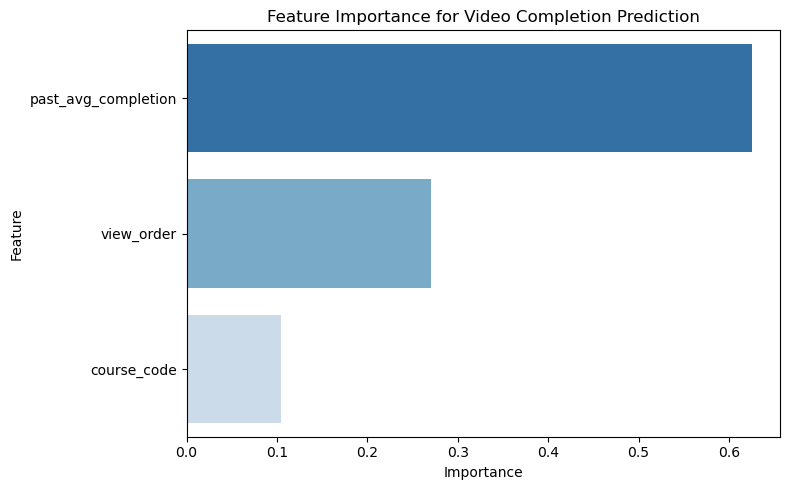

In [47]:
# Analyze feature importance to understand key predictors
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance for visualization
plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importance, x='Importance', y='Feature', hue='Feature', palette='Blues_r', legend=False)
plt.title("Feature Importance for Video Completion Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [48]:
# Count learners predicted as at-risk (non-completers)
test_results = X_test.copy()
test_results['actual_completed'] = y_test
test_results['predicted_completed'] = y_pred
at_risk_learners = test_results[test_results['predicted_completed'] == 0]
print("\nNumber of learners predicted as at-risk:", len(at_risk_learners))


Number of learners predicted as at-risk: 33246


##### Process and Insight Summary - Task 7


- This task aimed to uncover which features are most influential in predicting whether a student finishes a video. As shown in the feature importance chart, past average completion is by far the strongest predictor, suggesting that a learner’s prior engagement behavior is highly indicative of future outcomes.

- Following that, view order (i.e., when a video appears in the sequence) also plays a role, possibly reflecting fatigue or preference for earlier content. The course code had the least influence, meaning the type of course mattered less than the student’s habits and the video’s position. These insights can guide personalization and intervention strategies.

### Task 8: Smart Dropout Alerts - Retention Analysis.

- Identify learners who start with high completion (≥ 70%) and later drop to low completion (< 30%)

- Flag these learners as dropout-risk for early intervention.

In [51]:
# Add a view order column to simulate the order of video interactions

df['view_order'] = df.groupby('student_id').cumcount()

In [52]:
# detecting learners who start strong (>=70%) and later drop (<30%)
def is_dropout_risk(group):
    group = group.sort_values('view_order')
    n = len(group)
    
    if n < 4:
        return False  # not enough videos to analyze behavior
    
    early = group.head(n // 2)['completion_rate_percent']
    late = group.tail(n // 2)['completion_rate_percent']
    
    return (early.mean() >= 70) and (late.mean() <= 30)

In [53]:
# Grouping by student and apply the function (exclude group keys to avoid warning)
dropout_risks = df.groupby('student_id', group_keys=False)[['completion_rate_percent', 'view_order']].apply(is_dropout_risk)

# Get IDs of at-risk learners
at_risk_ids = dropout_risks[dropout_risks].index.tolist()

# Print out the list of risky learners
print("Learners at risk of dropping off due to declining engagement:")
print(at_risk_ids)

Learners at risk of dropping off due to declining engagement:
['064c4b46fd63', '1f7ecd4af432', '27c09dffad4e', '3c58f8da72ea', '404cd79e5bd6', '4dc34dadc9ad', '5e2e57208113', '71ea327e26d1', '7a56ae03e7a3', '9bc9725fa9db', 'a50fc239a8a2', 'a849cddd912d', 'aa3b094b3d05', 'ab21eb4b2352', 'b4a1c3149064', 'b93e6e45d6a5', 'c123e9d1df55', 'c7a2f371eff3', 'e316daedbd71']


In [54]:
# View the completion trends of at-risk learners
at_risk_df = df[df['student_id'].isin(at_risk_ids)].sort_values(['student_id', 'view_order'])

# Preview sample
at_risk_df.head(10)

,student_id,course_id,course_code,video_title,role,completion_rate_percent,churn,completed,past_avg_completion,view_order
292300,064c4b46fd63,159,GST111,GST111_Y1_01_03,Student,100.0,0,1,47.040000,0
322796,064c4b46fd63,159,GST111,GST111_Y1_01_02,Student,100.0,0,1,47.040000,1
408799,064c4b46fd63,163,Introduction to Computing,CSC101_Y1_01_01 (1),Student,12.9,1,0,47.040000,2
442688,064c4b46fd63,165,GST121,GST121_Y1_01_02,Student,9.4,1,0,47.040000,3
473290,064c4b46fd63,163,INTRODUCTION TO COMPUTING,CSC101_Y1_01_01 (1),Student,12.9,1,0,47.040000,4
557832,064c4b46fd63,160,MTH101,MTH101LL_Y1_01_02,Student,1.0,1,0,47.040000,5
263462,1f7ecd4af432,210,GST 101,The Role of Grammar in Writing,Student,59.1,0,1,53.666667,0
481115,1f7ecd4af432,210,GST 101,Writing Studio - Overview of Writing,Student,100.0,0,1,53.666667,1
578462,1f7ecd4af432,146,PHY101,Live Lesson With Google Meet (PHY 101) (2024-0...,Student,1.9,1,0,53.666667,2
620009,1f7ecd4af432,146,PHY101,Live Lesson With Google Meet (PHY 101)  2024_...,Student,3.3,1,0,53.666667,3


##### Process and Insight Summary - Task 8


- In this task, I focused on detecting students showing signs of declining engagement—those whose completion rates were consistently low or dropping over time. Using historical behavior like past average completion, we flagged learners at risk of churn (dropping out or disengaging).

- The table preview shows examples where students initially had high completion rates but began abandoning subsequent videos. For instance, one student went from fully completing GST111 videos to abandoning multiple **CSC101 and MTH101** videos, with completion dipping below 15%. These patterns suggest waning interest or possible struggles with course difficulty.

- Such learners are prime candidates for early intervention, whether through nudges, support resources, or personalized content recommendations, to prevent drop-off.